In [1]:
import pandas as pd
df = pd.read_csv('LECLERC_cleaned.csv')

df.head()

,Platform,Product Name,Seller,Price,Delivery Fees,Delivery Date,Product State,Seller Rating,Timestamp,ID
0,E.Leclerc,"Apple iPhone 16 15,5 cm (6.1"") Double SIM iOS ...",E.Leclerc,1349.00,Offerte,Prévue entre le 27/12/24 et le 28/12/24,NEUF,0,24/12/2024 13:30:11,b4d80ce6-9dc1-46b0-8fed-d0a5693e15da
1,E.Leclerc,"Apple iPhone 16 15,5 cm (6.1"") Double SIM iOS ...",Icoza,1408.17,Offerte,Prévue entre le 27/12/24 et le 28/12/24,NEUF,0,24/12/2024 13:30:11,be467955-7c7b-4417-8400-6c9573523c75
2,E.Leclerc,"Apple iPhone 16 15,5 cm (6.1"") Double SIM iOS ...",Stock e-commerce,1409.17,Offerte,Prévue entre le 27/12/24 et le 28/12/24,NEUF,0,24/12/2024 13:30:11,b3758c8e-0a4f-4134-bc5b-f50cb2cf4b11
3,E.Leclerc,"Apple iPhone 16 15,5 cm (6.1"") Double SIM iOS ...",Maxmovil,1432.28,Offerte,Prévue entre le 27/12/24 et le 28/12/24,NEUF,0,24/12/2024 13:30:11,919c0f58-ed1a-412b-a684-9658c02dc625
4,E.Leclerc,"Apple iPhone 16 15,5 cm (6.1"") Double SIM iOS ...",Monsieurplus,1473.99,Offerte,Prévue entre le 27/12/24 et le 28/12/24,NEUF,0,24/12/2024 13:30:11,a986b2c1-054c-4dda-be81-ad3f466b3984


In [2]:
sum(df['Timestamp'].isna())

0

Calcule de la variation moyenne = mean(prix_t - prix_(t-1))

In [3]:
# 1. Trier le DataFrame par 'ID' et 'Timestamp'
df = df.sort_values(by=['ID', 'Timestamp'])

# 2. Pour chaque id, récupérer le prix de la période précédente avec shift(1)
df['price_previous'] = df.groupby('ID')['Price'].shift(1)

# 3. Calculer la variation : prix_t - prix_t-1
df['variation'] = df['Price'] - df['price_previous']

# Afficher le DataFrame avec les colonnes calculées
print("DataFrame avec variations :")
print(df)

# 4. Calculer la variation moyenne pour chaque id en ignorant les valeurs NaN (première ligne de chaque groupe)
mean_variation = df.groupby('ID')['variation'].mean().reset_index()

print("\nVariation moyenne par id :")
print(mean_variation)

DataFrame avec variations :
         Platform                                       Product Name  \
37189   E.Leclerc  Apple iPhone 16 Plus 17 cm (6.7") Double SIM i...   
37285   E.Leclerc  Apple iPhone 16 Plus 17 cm (6.7") Double SIM i...   
37381   E.Leclerc  Apple iPhone 16 Plus 17 cm (6.7") Double SIM i...   
37477   E.Leclerc  Apple iPhone 16 Plus 17 cm (6.7") Double SIM i...   
37572   E.Leclerc  Apple iPhone 16 Plus 17 cm (6.7") Double SIM i...   
...           ...                                                ...   
117136  E.Leclerc     Smartphone Apple iPhone 14 256Go Noir Midnight   
117231  E.Leclerc     Smartphone Apple iPhone 14 256Go Noir Midnight   
117326  E.Leclerc     Smartphone Apple iPhone 14 256Go Noir Midnight   
117421  E.Leclerc     Smartphone Apple iPhone 14 256Go Noir Midnight   
117516  E.Leclerc     Smartphone Apple iPhone 14 256Go Noir Midnight   

                                          Seller   Price Delivery Fees  \
37189   [🇫🇷] e-Recycle - Recondit

Compter le nombre d'individus non algorithmiques

In [4]:
df['date'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df['date'] = df['date'].dt.date

In [5]:
sum(df['date'].isna())

0

In [6]:
result = df.groupby(['date', 'ID'])['variation'] \
           .apply(lambda x: ((x != 0) & (x.notna())).sum()) \
           .reset_index(name='nombre_variations')

In [7]:
df['Product Name'].unique()

array(['Apple iPhone 16 Plus 17 cm (6.7") Double SIM iOS 18 5G USB Type-C 128 Go Noir',
       'Smartphone Apple iPhone 15 256GB noir',
       'Apple iPhone 16 Plus 17 cm (6.7") Double SIM iOS 18 5G USB Type-C 512 Go Noir',
       'Smartphone Apple iPhone 15 128GB noir',
       'Apple iPhone 16 Plus 17 cm (6.7") Double SIM iOS 18 5G USB Type-C 256 Go Noir',
       'Apple iPhone 14 15,5 cm (6.1") Double SIM iOS 17 5G 512 Go Noir',
       'Apple iPhone 16 15,5 cm (6.1") Double SIM iOS 18 5G USB Type-C 256 Go Noir',
       'Smartphone Apple iPhone 14 256Go Noir Midnight',
       'Apple iPhone 16 Pro 16 cm (6.3") Double SIM iOS 18 5G USB Type-C 1 To Noir',
       'Apple iPhone 16 15,5 cm (6.1") Double SIM iOS 18 5G USB Type-C 512 Go Noir',
       'Non trouvé'], dtype=object)

In [8]:
result

,date,ID,nombre_variations
0,2024-12-24,01b7e376-50ec-402d-9525-6553a5c134b4,1
1,2024-12-24,04910544-32aa-4cb3-abdc-46bf09eae778,1
2,2024-12-24,057f29ec-d079-4262-a92a-bfbd5d132e4f,1
3,2024-12-24,0783aaf9-1c3d-4e89-bf81-12eef0d89af4,0
4,2024-12-24,09a67481-0949-4185-9de5-54674f63fdc6,0
...,...,...,...
2811,2025-01-22,f616ad01-09c3-4bce-b095-3f8268b93f31,0
2812,2025-01-22,f9c4c013-cd2f-4562-b212-bbda62d3dfe2,0
2813,2025-01-22,f9cfb56f-c973-4ec8-bd17-891e9bbae491,0
2814,2025-01-22,fbd1e24a-0bb3-4815-b001-ae977728204c,1


In [9]:
ids = result['ID'][result['nombre_variations']>=10].unique()
ids

#print(len(df['ID'].unique()))

array(['fbd1e24a-0bb3-4815-b001-ae977728204c',
       '3ecb8c89-ba80-452a-83ce-b8092210802d',
       '685392d4-1bed-42a9-b494-68b7b9e40f14',
       'd1202f91-cbc3-49f1-b4c2-2510ec6c74b2',
       '6e17c91c-276b-4af9-9be9-9b404e7be84d',
       'e6567211-74ae-464e-a303-092f95f8d9ce',
       'd62de420-e5c2-470c-a574-784c90e6e4b5',
       '3f9c0953-9c70-441a-bdb5-fb68a4308787',
       '9a29964d-8a10-41ad-a534-4704fc4900d1'], dtype=object)

In [10]:
dates_10 = [date for id_val, date in zip(df['ID'], df['Timestamp']) if id_val in ids]

In [11]:


dates_dt = pd.to_datetime(dates_10, dayfirst=True)

max_date10 = dates_dt.max()

min_date10 = dates_dt.min()


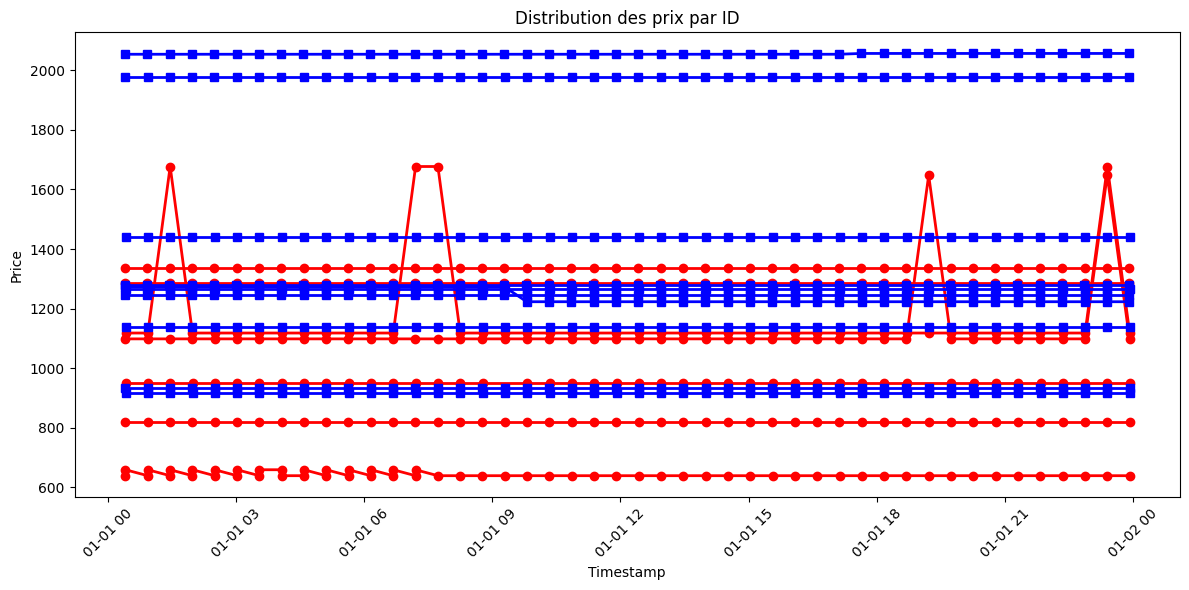

In [12]:
import matplotlib.pyplot as plt
import numpy as np

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df_period = df[(df['Timestamp'] >= min_date10) & (df['Timestamp'] <= pd.to_datetime(max_date10))]

# Sélectionner les IDs autres que ceux de ids, puis en choisir aléatoirement 10
autres_ids_possibles = df_period.loc[~df_period['ID'].isin(ids), 'ID'].unique()
if len(autres_ids_possibles) >= 10:
    random_ids = np.random.choice(autres_ids_possibles, size=10, replace=False)
else:
    random_ids = autres_ids_possibles

# Concaténer les deux groupes d'IDs
selected_ids = np.concatenate((ids, random_ids))

plt.figure(figsize=(12, 6))

# Pour chaque ID sélectionné, tracer la série temporelle des prix
for id_val in selected_ids:
    # Extraire et trier les données par Timestamp pour l'ID courant
    df_id = df_period[df_period['ID'] == id_val].sort_values(by='Timestamp')
    # Définir le marqueur et la couleur :
    # - Si l'ID est dans ids, on utilise un cercle ('o') et la couleur rouge
    # - Sinon, on utilise un carré ('s') et la couleur bleu
    marker = 'o' if id_val in ids else 's'
    color = 'red' if id_val in ids else 'blue'
    
    plt.plot(df_id['Timestamp'], df_id['Price'],
             marker=marker, color=color, linewidth=2, label=f'ID {id_val}')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Distribution des prix par ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
print(min_date10)

2024-12-24 13:30:38


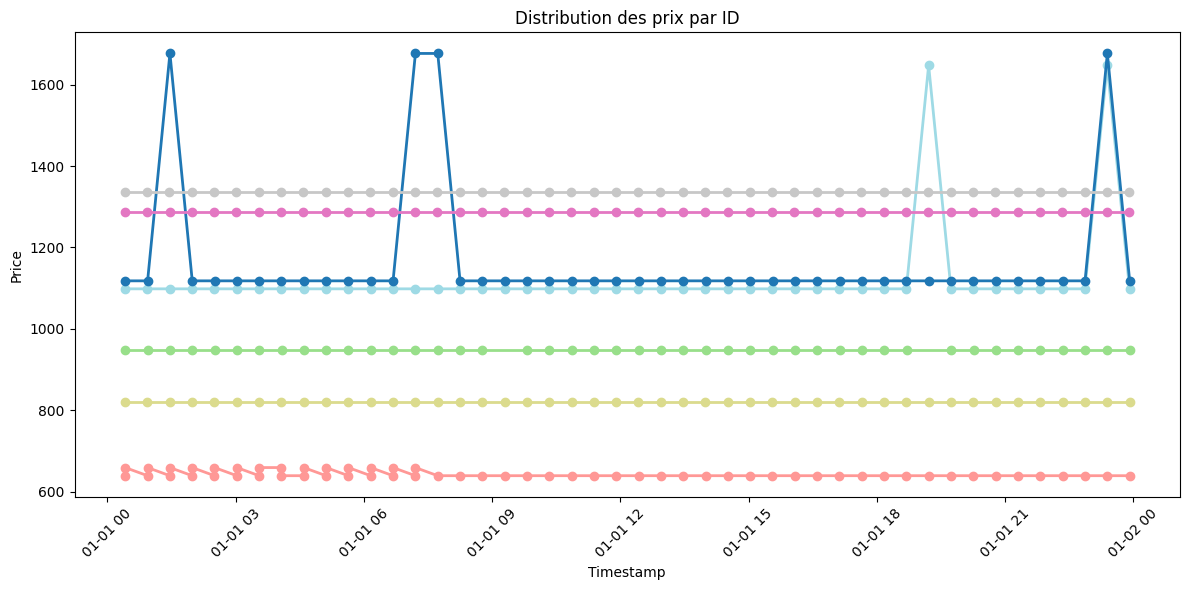

In [14]:
import matplotlib.pyplot as plt
import numpy as np

df_period = df[(df['Timestamp'] >= min_date10) & (df['Timestamp'] <= max_date10)]
#autres_ids_possibles = df_period.loc[~df_period['ID'].isin(ids), 'ID'].unique()
#if len(autres_ids_possibles) >= 10:
    #random_ids = np.random.choice(autres_ids_possibles, size=10, replace=False)
#else:
    #random_ids = autres_ids_possibles

# Concaténer les deux groupes d'IDs pour tracer uniquement ceux qui nous intéressent

#selected_ids = np.concatenate((ids, random_ids))
selected_ids = ids
# Attribution d'une couleur unique par ID via une colormap (ici, tab20)
unique_ids = np.unique(selected_ids)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_ids)))
color_map = dict(zip(unique_ids, colors))

plt.figure(figsize=(12, 6))

# Pour chaque ID sélectionné, tracer la série temporelle des prix
for id_val in selected_ids:
    # Extraire et trier les données par Timestamp pour l'ID courant
    df_id = df_period[df_period['ID'] == id_val].sort_values(by='Timestamp')
    # Choix du marqueur en fonction de l'appartenance à ids
    marker = 'o' if id_val in ids else 's'
    plt.plot(df_id['Timestamp'], df_id['Price'], marker=marker,
             color=color_map[id_val], linewidth=2, label=f'ID {id_val}')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Distribution des prix par ID')
ax = plt.gca()
# On récupère les ticks actuels, puis on ne garde qu'un tick sur 10 pour alléger l'affichage
ticks = ax.get_xticks()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-> Contrôler par le nombre d'observations du produit du vendeur par jour

-> Contrôler neuf vs occasion


nbre de changements de prix par telephone/ nbre d'observations du telephone

-> séparer les iPhones par entrée de gamme, milieu de gamme ,haut de gamme = pour pouvoir relier les biens similaires /// ou juste analyser les produits identiques 

-> niveau  de 'professionnalisation' des vendeurs, nombre de ventes

-> trouver des infos sur les vendeurs, son pays, son nombre de ventes -> pour variable de contrôle

-> regarder si les prix en t s'adaptent au prix le plus bas en t-1



Caluler le nombre de modif du prix/ le nombre d'observation

In [15]:
df['variation bool'] = [1 if v > 0 else 0 for v in df['variation']]

In [16]:
pd.set_option('display.max_rows', None)

# Agréger en utilisant une liste de fonctions et renommer les colonnes par la suite
result = df.groupby('ID')['variation bool'].agg(['sum', 'count'])
result.columns = ['sum_val', 'count_val']

# Calculer le ratio sum/count
result['ratio'] = result['sum_val'] / result['count_val']

print(result)


                                      sum_val  count_val     ratio
ID                                                                
0100f7b6-135f-42d7-9172-cffac6681e0b        0        128  0.000000
01b7e376-50ec-402d-9525-6553a5c134b4        2       1247  0.001604
04910544-32aa-4cb3-abdc-46bf09eae778        1       1248  0.000801
057f29ec-d079-4262-a92a-bfbd5d132e4f       24       1247  0.019246
0783aaf9-1c3d-4e89-bf81-12eef0d89af4        0       1248  0.000000
09a67481-0949-4185-9de5-54674f63fdc6        0        712  0.000000
0d1f2514-6006-4a37-9d1a-afa3a8bc52a2        7       1247  0.005613
119b4e6a-2eaa-42b5-932c-8dc572ac686d        2       1248  0.001603
124dfbb7-bd72-4cd1-a885-be027bcf9e80        0         77  0.000000
171f804f-f427-404b-ae2c-cb730d1fce73       37       1247  0.029671
19dc2137-3351-4dc1-9d67-3c18042c8526        0        712  0.000000
1e976c9c-94b3-4464-bfa5-6d61f1edfc5e       22       1247  0.017642
23160cbd-1bdc-4190-9c04-21f44ee721d7        0        712  0.00

In [17]:
pd.set_option('display.max_rows', None)
df[df['ID']=='ffb5f9a8-ad45-42cb-bb07-3094745f832b']

,Platform,Product Name,Seller,Price,Delivery Fees,Delivery Date,Product State,Seller Rating,Timestamp,ID,price_previous,variation,date,variation bool
104500,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,NaN,NaN,2025-01-19,0
104594,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0
104688,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0
104782,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0
104876,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0
104970,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0
105064,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0
105158,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0
105252,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0
105346,E.Leclerc,Smartphone Apple iPhone 14 256Go Noir Midnight,Nest Green,569.0,Offerte,Prévue entre le 21/01/25 et le 22/01/25,OCCASION - BON ÉTAT,0,NaT,ffb5f9a8-ad45-42cb-bb07-3094745f832b,569.0,0.0,2025-01-19,0


1) Détecter la présence de vendeurs algorithmiques 
2) Effet sur les prix ? inflationiste ? 
3) Faire des tests de robustesse avec d'autres moyens de détection de vendeurs algorithmiques, en utilisant les différents critères (celui qui suit le prix)


In [18]:
df['Product State'].unique()

array(['OCCASION - PARFAIT - JAMAIS UTILISÉ', 'NEUF',
       'OCCASION - BON ÉTAT', 'OCCASION - TRÉS BON ÉTAT',
       'OCCASION - ÉTAT CORRECT', 'Non trouvé'], dtype=object)